# Проект по анализу гипотез для увеличения выручки интернет-магазина

# Описание проекта

Отделом маркетинга подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Задачи:**
* Приоритизировать гипотезы
* Проанализировать A/B-тест


**Описание данных:**

Файл `hypothesis.csv`.

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл `orders.csv`.

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Файл `visitors.csv`.

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#  Приоритизация гипотез.

In [ ]:
# выгрузка данных из файла hypothesis.csv

data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

# вывод содержимого датафрейма

pd.set_option('display.max_colwidth', False)
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Приоритизация гипотез через фреймворк ICE

In [ ]:
# Расчет ICE и сохрание результатов в отдельный столбец

data['ICE'] = round(data['Impact']*data['Confidence']/data['Efforts'],1)


# Вывод названия категории и приоритета

data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


### Приоритизация гипотез через фреймворк RICE

In [ ]:
# Расчет RICE и сохрание результатов в отдельный столбец

data['RICE'] = data['Reach']*data['Impact']*data['Confidence']/data['Efforts']

# Вывод названия категории и приоритета
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод:
По методу ICE наибольшую оценку получили гипотезы 8, 0, 7.
По методу RICE приоритеты изменились на гипотезы 7,2,0.

Это объясняется тем, что в случае фреймворка ICE, в отличие от RICE, не учитывается охват изменений, тогда как это важная составляющая оценки гипотез.

Для данного исследования возьмем за основу приоритизацию по методу RICE и гипотезы 7, 2, 0.

# Анализ A/B-теста

In [ ]:
# Выгрузка данных из файла orders.csv

orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

# Вывод первых 5 строк таблицы

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
# Выгрузка данных из файла visitors.csv

visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

# Вывод первых 5 строк таблицы

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


## Предобработка данных

In [ ]:
# Проверим таблицу visitors на наличие пропусков
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
# Проверим таблицу visitors на наличие дубликатов
visitors.duplicated().sum()

0

In [ ]:
# Приведем тип данных в столбце date таблицы orders к формату datetime
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
# Проверим таблицу orders на наличие пропусков
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
# Проверим таблицу orders на наличие дубликатов
visitors.duplicated().sum()

0

In [ ]:
# Приведем тип данных в столбце date таблицы orders к формату datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [ ]:
# Проверим группы на совпадение пользователей

# Отберем пользователей группы А
group_a = orders.query('group == "A"')

# Отберем пользователей группы B
group_b = orders.query('group == "B"')

#Отберем пользователей, которые попали в обе группы через объединение таблиц
visitors_ab = pd.merge(group_a, group_b, on='visitorId')
visitors_dup = list(visitors_ab['visitorId'].unique())

print('Количестов пользователей в группе A:', group_a['visitorId'].nunique())
print('Количестов пользователей в группе B:', group_b['visitorId'].nunique())
print('Количество одинаковых пользователей в группах:', visitors_ab['visitorId'].nunique())

Количестов пользователей в группе A: 503
Количестов пользователей в группе B: 586
Количество одинаковых пользователей в группах: 58


In [ ]:
# Удалим пользователей, которые присутствуют в двух группах сразу

orders = orders.query('visitorId not in @visitors_dup')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Вывод:
* Пропуски и дубликаты в таблицах отсутствуют.
* Тип данных в столбце `date` в таблицах изначально имеет неправильный формат и был приведен к формату `datetime`.
* Удалены пользователи, которые присутвтуют одновременно в двух выборках (8% данных).

### Построение графика кумулятивной выручки по группам

In [ ]:
# создаем массив уникальных пар значений дат и групп теста

datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах

ordersAggregated = (datesGroups.apply(
                    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина

visitorsAggregated = (datesGroups.apply(
                        lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                        .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


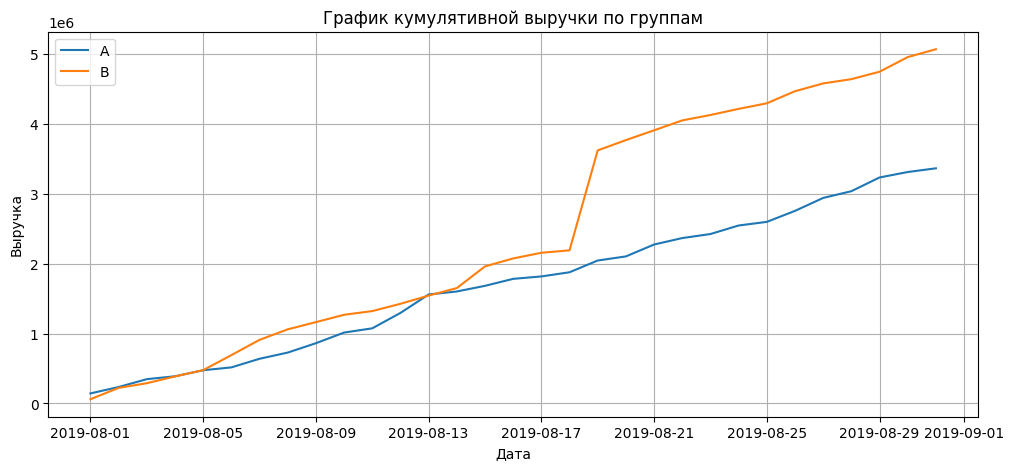

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,5))
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

Выводы:
Группа B показывает стабильно большую выручку, чем группа "A". Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки группы "B" в одной точке резко растет после 18.08.2019. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построение графика кумулятивного среднего чека по группам.

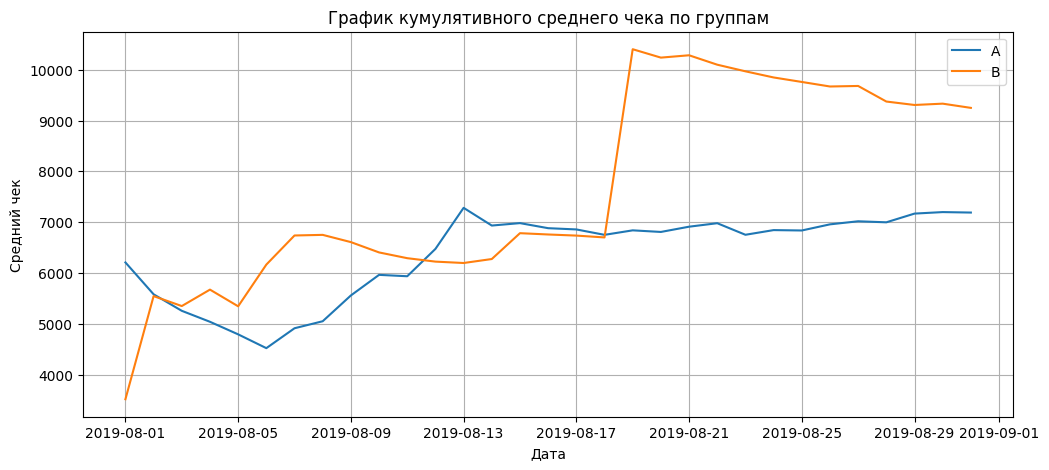

In [ ]:
plt.figure(figsize=(12,5))
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')


plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

Выводы: Средний чек по группам становится равномерным ближе к концу теста: показывает небольшой рост для группы "A" и падение для группы "B". Также присутствует резкий подъем среднего чека для группы B после 18.08.2019. Возможно, в группу B попали крупные заказы (резкий всплеск на графике).

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

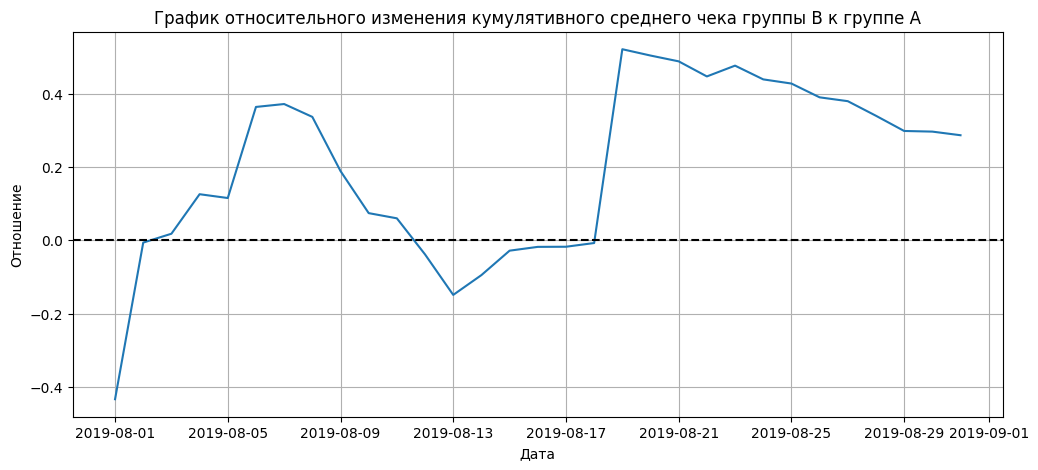

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,5))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Отношение')
plt.xlabel('Дата')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко «скачет». Вероятно где-то (скорее всего в группе В) есть крупные заказы и выбросы.

### Построение графика кумулятивного среднего количества заказов на посетителя по группам.

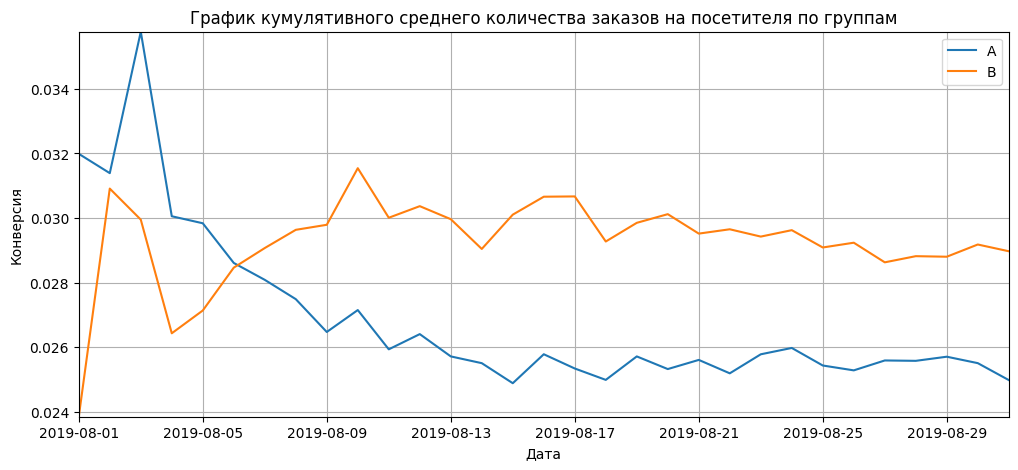

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,5))
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Конверсия')
plt.xlabel('Дата')


plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([min(cumulativeData['date']),
          max(cumulativeData['date']),
          min(cumulativeData['conversion']),
          max(cumulativeData['conversion'])]);

Вывод: Среднее количество заказов на посетителя в общем у группы В выше, хотя у группы А был всплекс в начале и количество было выше группы B. После резких скачков в превую неделю среднее количество заказов зафиксировалась и показывает относительно стабильную динамику.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

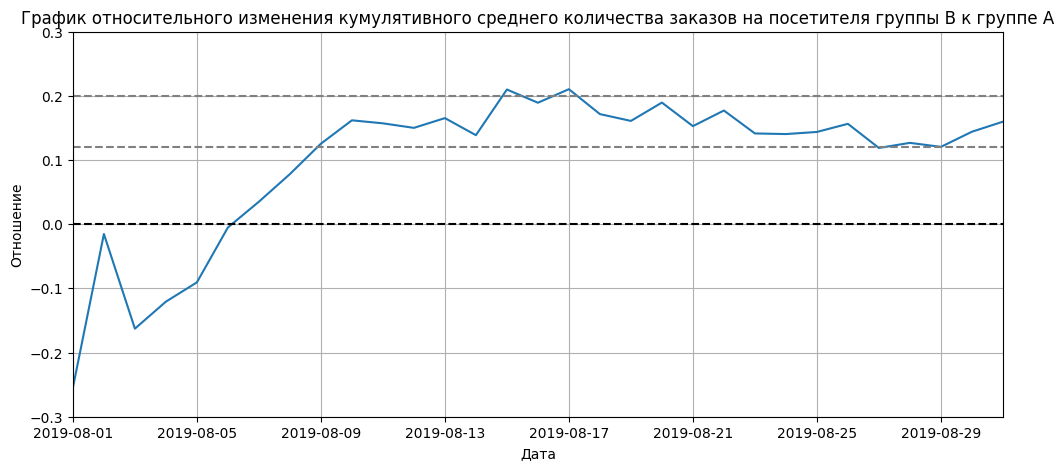

In [ ]:
mergedCumulativeConversions = (
        cumulativeDataA[['date','conversion']]
        .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
    )
plt.figure(figsize=(12,5))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Отношение')
plt.xlabel('Дата')

plt.plot(
        mergedCumulativeConversions['date'],
        mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
        label="Относительный прирост конверсии группы B относительно группы A"
)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([min(cumulativeData['date']), max(cumulativeData['date']), -0.3, 0.3]);

Вывод: Данный график подтверждает выводы по предыдущему графику. Через неделю среднее количество заказов в группе B стабильно выше чем в группе A более чем на 12%.

### Построение точечного графика количества заказов по пользователям.

In [ ]:
# Подсчет количества заказов по пользователям

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

# Переименуем столбцы

ordersByUsers.columns = ['visitorId', 'orders']


ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


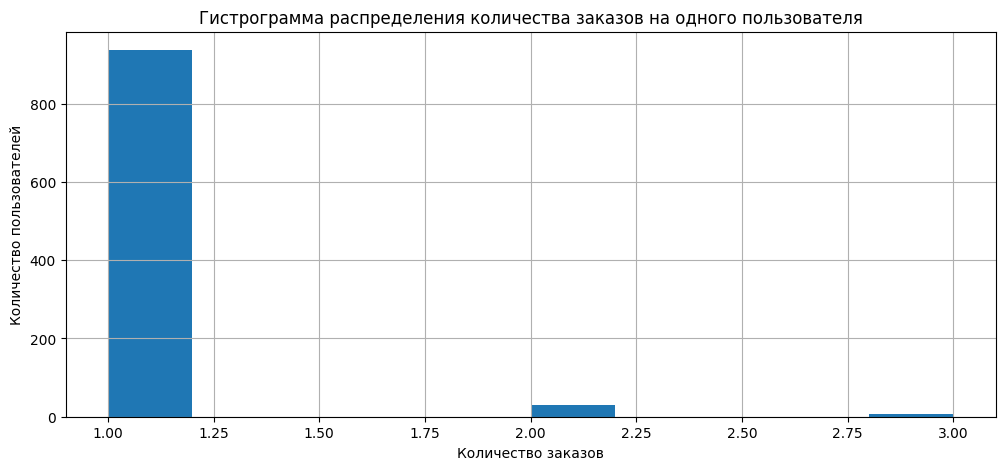

In [ ]:
# Построим гистрограмму распределения количества заказов на одного пользователя.

plt.figure(figsize=(12,5))
plt.grid()
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.hist(ordersByUsers['orders'], bins = 10);

Вывод: Большинство пользователей заказывали один раз, также есть большое количество пользователй с 2-3 заказами.

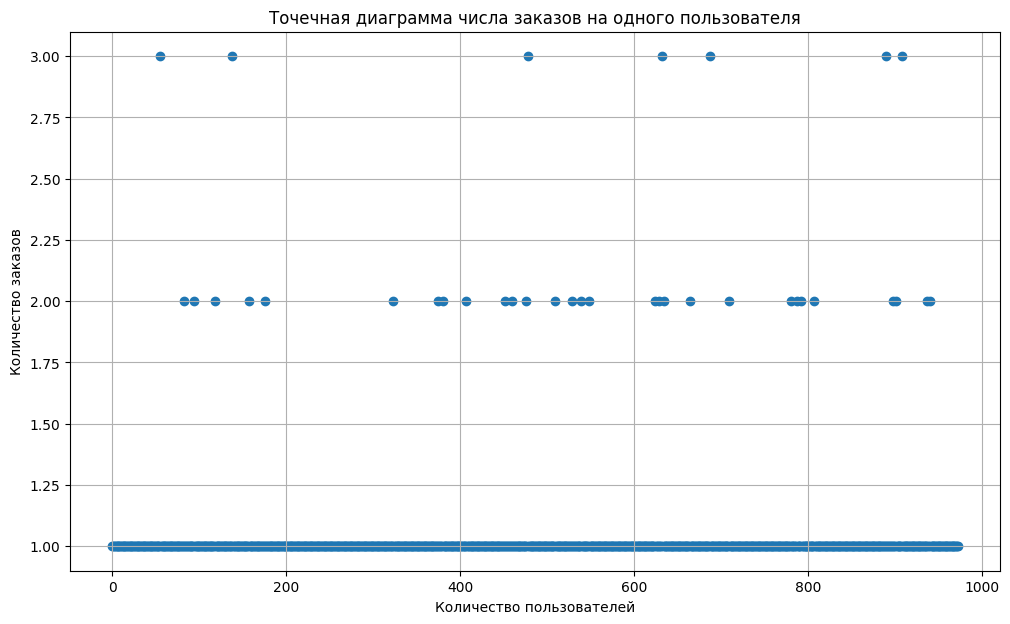

In [ ]:
# Построим точечную диаграмму числа заказов на одного пользователя

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12,7))
plt.grid()
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.scatter(x_values, ordersByUsers['orders'])

Вывод: Точечная диаграмм подвтверждает выводы, что большинство пользователей сделали один заказ, а также много пользователей с 2-3 заказами

### Подсчет 95-го и 99-го перцентилей количества заказов на пользователя.

In [ ]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Вывод: Не более 1% пользователей оформили больше чем 2 заказа.

### Построение точечного графика стоимостей заказов.

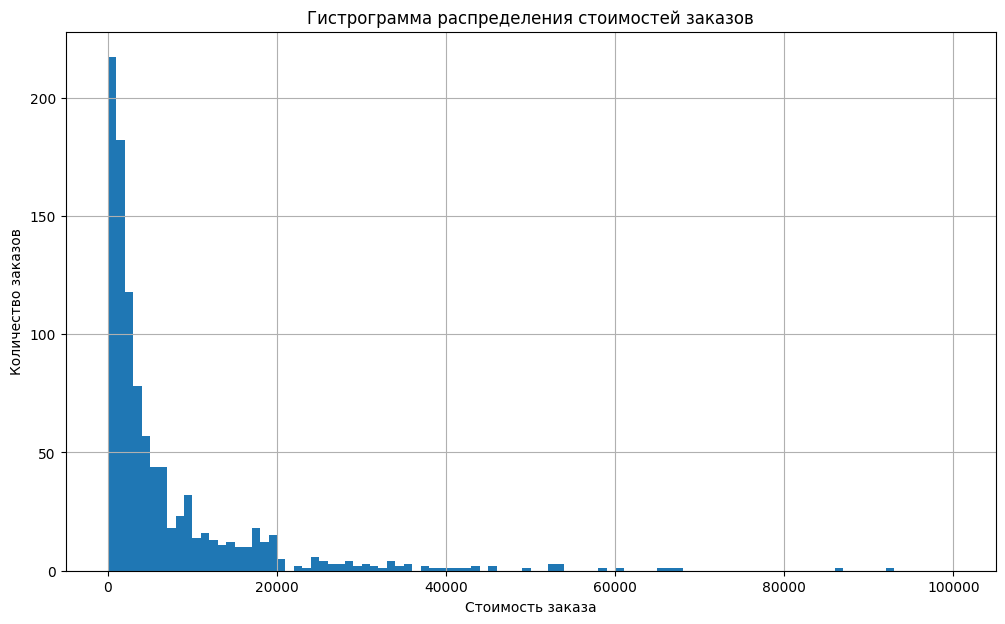

In [ ]:
# Построим гистогамму распределения стоимостей заказов

plt.figure(figsize=(12,7))
plt.grid()
plt.title('Гистрограмма распределения стоимостей заказов')
plt.ylabel('Количество заказов')
plt.xlabel('Стоимость заказа')
plt.hist(orders['revenue'], range=(0,100000), bins=100);

Вывод: Большинство сделаных заказов имеют выручку меньше 20000.

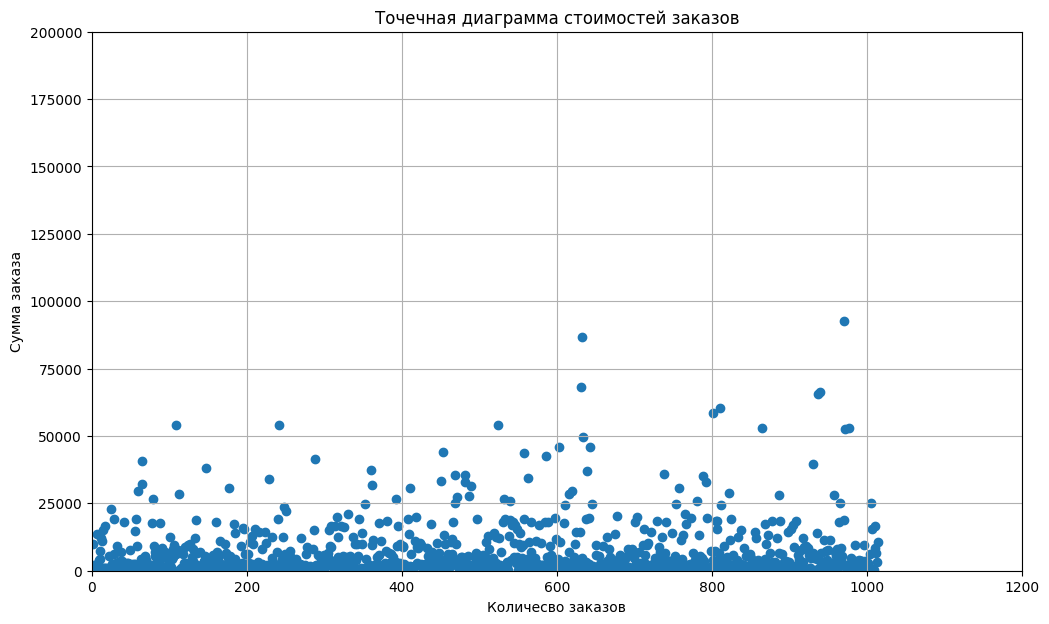

In [ ]:
# Построим точечную диаграмму стоимостей заказов

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(12,7))
plt.grid()
plt.title('Точечная диаграмма стоимостей заказов')
plt.ylabel('Сумма заказа')
plt.xlabel('Количесво заказов')
plt.axis([0, 1200, 0, 200000])

plt.scatter(x_values, orders['revenue']);

Вывод: Большинство пользователей делает заказы на сумму менее 25000 рублей.

### Подсчет 95-го и 99-го перцентилей стоимости заказов.

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Вывод: Не более 5% пользователей делали заказ на сумму более 26785, менее 1% заказ более 53904. Соответственно будем считать все заказы стоимостью более чем 53904 рублей аномальными.

### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `visitorId`, `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменная `sampleA` должна состоять из двух частей:
* Список с количеством заказов для каждого из пользователей.
* Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах.

In [ ]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


* Нулевая гипотеза: Конверсия в группе A равна группе B (статистическая значимость не значительна и сделать вывод о различии нельзя)
* Альтернативная гипотеза: Конверсия в группе A не равна группе B (между выборками имеется статистическая значимость)

Применим критерий Манна-Уитни.

In [ ]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный показатель 'B' и 'A' =  {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value = 0.011
Относительный показатель 'B' и 'A' =  0.160


Вывод: P-value значительно меньше 0.05, не получилось подтвердить нулевую гипотезу.
Конверсия в группе A не равна группе B (между выборками имеется статистическая значимость). Относительный прирост среднего группы В к конверсии группы А равен 16%.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Проверим статистическую значимость различий в среднем чеке между сегментами.
* Нулевая гипотеза: Средний чек в группе А равен среднему чеку в группе В.
* Альтернативная гипотеза:  Средний чек в группе A не равен среднему чеку в группе B.

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


P-value значительно больше 0.05,  значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек в группе A равен среднему чеку в группе B.

Относительный прирост среднего чека группы В к группе А равен 28,7%

### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

На основании проведенного анализа мы получили данные, что большинство пользователей не делает более 2 заказов и сумма покупки не превышает 53904 рублей.

Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 53 904 рубля. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 53 904 — `usersWithExpensiveOrders`. Объединим их в таблице abnormalUsers.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [99]))]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [99]))]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [99]))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64
16


Количество аномальных пользователей - 16. Проанализируем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам.
* Нулевая гипотеза: Конверсия в группе A равна группе B (статистическая значимость не значительна и сделать вывод о различии нельзя)
* Альтернативная гипотеза: Конверсия в группе A не равна группе B (между выборками имеется статистическая значимость)

In [ ]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.007
Относительный показатель 'B' и 'A' = 0.189


Вывод: P-value значительно меньше 0.05, не получилось подтвердить нулевую гипотезу. Конверсия в группе A не равна группе B (между выборками имеется статистическая значимость). Относительный прирост среднего группы В к конверсии группы А равен 18.9%, что выше, чем по неочищенным данным на 2,9%

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Проверим статистическую значимость различий в среднем чеке между сегментами.
* Нулевая гипотеза: Средний чек в группе А равен среднему чеку в группе В.
* Альтернативная гипотеза: Средний чек в группе A не равен среднему чеку в группе B.

In [ ]:
print('{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


print("{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
     )

0.788
-0.032


P-value значительно больше 0.05, значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек в группе A равен среднему чеку в группе B. Относительное снижение среднего чека группы В к группе А примерно равно 3%. Изменение по сравнению с прошлыми результатами - 25,5%.

Подтвердилась таже гипотеза, что и для неочищенных данных.

## Выводы

Имеющиеся факты по проведенному тесту:
* Есть статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий.
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
* График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к ухудшению.
* График различия среднего чека говорит о том, что результаты группы B лучше группы А на 28,7%: Но при отстутсвии анамалий мы видим незначительное снижение на 2%.

Исходя из обнаруженных фактов можно принять решение остановить тест, зафиксировать победу группы B над группой А. Группа B значительно лучше (эффективнее) группы A по конверсии, хотя по среднему чеку группы примерно равны